In [25]:
import numpy as np
import pandas as pd # data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans # KMeans clustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



In [26]:
#read file
content_df = pd.read_csv("C:\\Users\\Doctor.C\\Desktop\\MeCfsBiology\\Data_German\\augmenta-oncimmune_assay_data_export_for_rti.tsv", sep="\t", index_col=0)
individual_df = pd.read_csv("C:\\Users\\Doctor.C\\Desktop\\MeCfsBiology\\Data_German\\augmenta-oncimmune_phenotype_export_for_rti.tsv", sep="\t", index_col=0)
content_df_transposed = content_df.T

In [27]:
#convert row to column
content_df_transposed.shape

(103, 1134)

In [28]:
individual_df.shape

(103, 4)

In [29]:
individual_df.index

Index(['COR-7349-D2-POST', 'COR-6215-D2-POST', 'COR-3717-D2-POST',
       'COR-8330-D2-POST', 'COR-8763-D2-POST', 'COR-4361-D2-POST',
       'COR-8843-D2-POST', 'COR-9546-D2-POST', 'COR-1481-D2-POST',
       'COR-5218-D2-POST',
       ...
       'COR-9504-D2-POST', 'COR-6813-D2-POST', 'COR-1699-D2-POST',
       'COR-9633-D2-POST', 'COR-5449-D2-POST', 'COR-5530-D2-POST',
       'COR-5800-Other', 'COR-4582-D1-PRE', 'COR-6048-D1-PRE',
       'COR-3676-Other'],
      dtype='object', name='ParticipantID', length=103)

In [30]:
content_df_transposed.index.name = 'ParticipantID'

In [31]:
merged_df = content_df_transposed.join(individual_df, how='inner')
y= merged_df['Phenotype']

In [32]:
individual_df.head

<bound method NDFrame.head of                  Sample_Source timepoint    cor_id Phenotype
ParticipantID                                               
COR-7349-D2-POST        Plasma   D2-POST  COR-7349    ME/CFS
COR-6215-D2-POST        Plasma   D2-POST  COR-6215    ME/CFS
COR-3717-D2-POST        Plasma   D2-POST  COR-3717    ME/CFS
COR-8330-D2-POST        Plasma   D2-POST  COR-8330    ME/CFS
COR-8763-D2-POST        Plasma   D2-POST  COR-8763    ME/CFS
...                        ...       ...       ...       ...
COR-5530-D2-POST        Plasma   D2-POST  COR-5530        HC
COR-5800-Other          Plasma     Other  COR-5800        HC
COR-4582-D1-PRE         Plasma    D1-PRE  COR-4582    ME/CFS
COR-6048-D1-PRE         Plasma    D1-PRE  COR-6048    ME/CFS
COR-3676-Other          Plasma     Other  COR-3676    ME/CFS

[103 rows x 4 columns]>

In [33]:
content_df_transposed.head

<bound method NDFrame.head of Molecule             ANXA2  ARHGEF11      ASB9       B2M     CACYBP  \
ParticipantID                                                         
COR-7349-D2-POST  7.417853  6.813781  7.523562  6.643856   8.134426   
COR-6215-D2-POST  8.977280  6.882643  9.906139  7.654636   9.350939   
COR-3717-D2-POST  8.022368  6.375039  6.977280  6.499846   8.948367   
COR-8330-D2-POST  9.273796  7.098032  7.813781  7.851749   9.810572   
COR-8763-D2-POST  8.612868  6.636625  7.124121  7.189825   9.153552   
...                    ...       ...       ...       ...        ...   
COR-5530-D2-POST  8.515700  6.942515  8.098032  7.238405   8.917372   
COR-5800-Other    8.266787  6.930737  8.588715  7.442943   8.622052   
COR-4582-D1-PRE   9.806550  8.049849  8.535275  8.584963  10.194757   
COR-6048-D1-PRE   9.415742  7.614710  7.682995  7.982994   9.791163   
COR-3676-Other    8.375039  7.864186  8.303781  7.882643   8.523562   

Molecule              CCNE2      DDX5     CDKN

In [34]:
merged_df.head

<bound method NDFrame.head of                      ANXA2  ARHGEF11      ASB9       B2M     CACYBP  \
ParticipantID                                                         
COR-7349-D2-POST  7.417853  6.813781  7.523562  6.643856   8.134426   
COR-6215-D2-POST  8.977280  6.882643  9.906139  7.654636   9.350939   
COR-3717-D2-POST  8.022368  6.375039  6.977280  6.499846   8.948367   
COR-8330-D2-POST  9.273796  7.098032  7.813781  7.851749   9.810572   
COR-8763-D2-POST  8.612868  6.636625  7.124121  7.189825   9.153552   
...                    ...       ...       ...       ...        ...   
COR-5530-D2-POST  8.515700  6.942515  8.098032  7.238405   8.917372   
COR-5800-Other    8.266787  6.930737  8.588715  7.442943   8.622052   
COR-4582-D1-PRE   9.806550  8.049849  8.535275  8.584963  10.194757   
COR-6048-D1-PRE   9.415742  7.614710  7.682995  7.982994   9.791163   
COR-3676-Other    8.375039  7.864186  8.303781  7.882643   8.523562   

                      CCNE2      DDX5     CDKN

In [35]:
y.head

<bound method NDFrame.head of ParticipantID
COR-7349-D2-POST    ME/CFS
COR-6215-D2-POST    ME/CFS
COR-3717-D2-POST    ME/CFS
COR-8330-D2-POST    ME/CFS
COR-8763-D2-POST    ME/CFS
                     ...  
COR-5530-D2-POST        HC
COR-5800-Other          HC
COR-4582-D1-PRE     ME/CFS
COR-6048-D1-PRE     ME/CFS
COR-3676-Other      ME/CFS
Name: Phenotype, Length: 103, dtype: object>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    merged_df, y, test_size=0.2, stratify=y, random_state=42
)

In [37]:

num_features = X_train.select_dtypes(include=np.number).columns.to_list()
cat_features = X_train.select_dtypes(include=['object']).columns.to_list()

preprocessor = make_column_transformer((StandardScaler(), num_features),
                                      (OneHotEncoder(), cat_features)
                                      )
scaled_data = preprocessor.fit_transform(X_train)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)

[0.4790928  0.06479642]


In [38]:
principal_components[:5]

array([[ 21.07797517, -12.11464154],
       [ 40.73198121,  -4.50157269],
       [ -1.88349351,   3.81380318],
       [  9.5361347 ,  -8.361961  ],
       [ -8.40696261,  -1.83049499]])

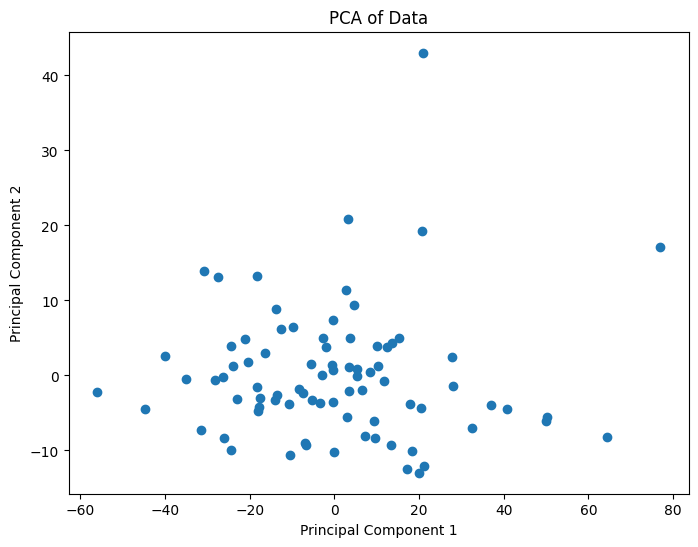

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data')
plt.show()

# K-Means Clustering

In [40]:
# PCA(n_components=2) above
# X_train, y_train: Get from train_test_split 

pc_df = pd.DataFrame(
    principal_components,
    columns=['PC1', 'PC2'],
    index=X_train.index  # Align index to sample IDs
)

# Attach phenotype for later crosstab and evaluation
pc_df['Phenotype'] = y_train.loc[pc_df.index]

pc_df.head()


,PC1,PC2,Phenotype
ParticipantID,,,
COR-2349-D2-POST,21.077975,-12.114642,ME/CFS
COR-8066-D2-POST,40.731981,-4.501573,ME/CFS
COR-6685-D2-POST,-1.883494,3.813803,HC
COR-3315-D2-POST,9.536135,-8.361961,HC
COR-9198-D2-POST,-8.406963,-1.830495,ME/CFS


In [41]:
# Select number of clusters
k = 3

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=20
)

# Only use the two principal components for clustering
pc_df['Cluster'] = kmeans.fit_predict(pc_df[['PC1', 'PC2']])

# Clustering evaluation metrics
sil = silhouette_score(pc_df[['PC1', 'PC2']], pc_df['Cluster'])
ari = adjusted_rand_score(pc_df['Phenotype'], pc_df['Cluster'])

print(f"Silhouette score: {sil:.3f}")
print(f"Adjusted Rand Index (vs Phenotype): {ari:.3f}")

print("\nCluster vs Phenotype contingency table:")
display(pd.crosstab(pc_df['Cluster'], pc_df['Phenotype']))


Silhouette score: 0.447
Adjusted Rand Index (vs Phenotype): 0.066

Cluster vs Phenotype contingency table:


Phenotype,HC,ME/CFS
Cluster,,
0,26,17
1,8,22
2,1,8


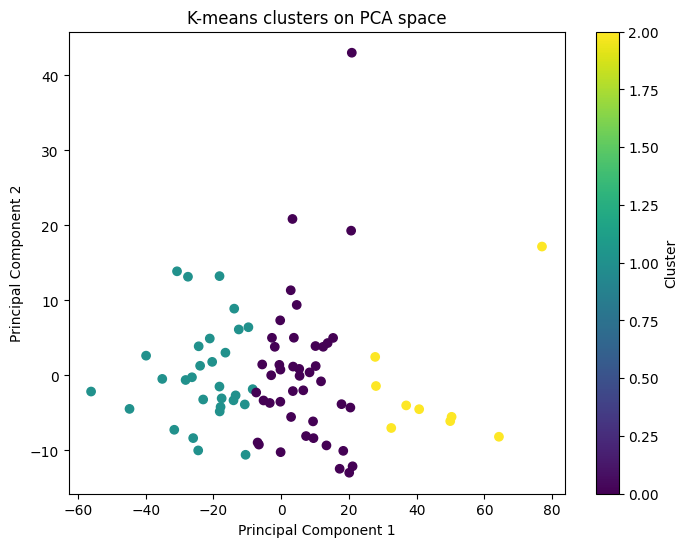

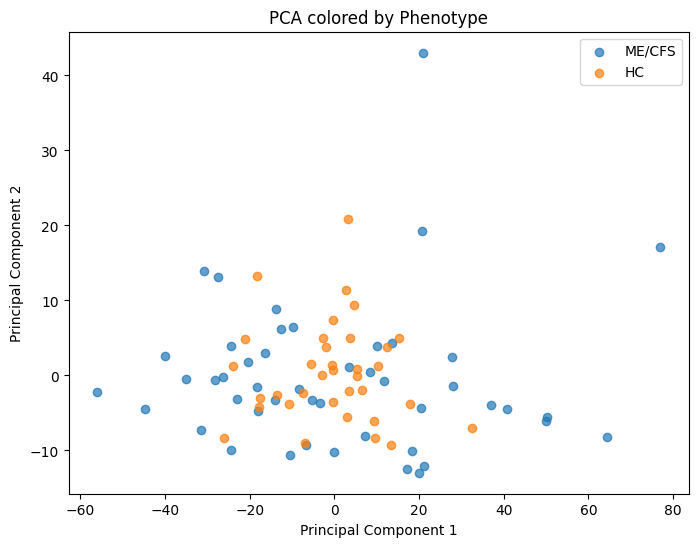

In [42]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pc_df['PC1'],
    pc_df['PC2'],
    c=pc_df['Cluster'],
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means clusters on PCA space')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Draw another plot colored by Phenotype for visual comparison
plt.figure(figsize=(8, 6))
phenotypes = pc_df['Phenotype'].unique()
for ph in phenotypes:
    subset = pc_df[pc_df['Phenotype'] == ph]
    plt.scatter(subset['PC1'], subset['PC2'], label=ph, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA colored by Phenotype')
plt.legend()
plt.show()


In [43]:
# First, attach the clustering results back to merged_df
df_with_clusters = merged_df.loc[pc_df.index].copy()
df_with_clusters['Cluster'] = pc_df['Cluster']

# biomarker columns: from the original assay matrix
biomarker_cols = content_df_transposed.columns

# Target phenotype label 
target_label = 'ME/CFS'

print("Phenotype unique values:", df_with_clusters['Phenotype'].unique())

if target_label not in df_with_clusters['Phenotype'].unique():
    print(f"Warning: '{target_label}' not found in Phenotype column. Please check the actual phenotype names and update target_label accordingly.")
else:
    # Calculate proportion of ME/CFS in each cluster
    cluster_ph_table = pd.crosstab(
        df_with_clusters['Cluster'],
        df_with_clusters['Phenotype'],
        normalize='index'
    )

    display(cluster_ph_table)

    # Find the cluster with the highest proportion of ME/CFS
    me_cluster = cluster_ph_table[target_label].idxmax()
    print(f"\nCluster enriched for {target_label}: {me_cluster}")

    # That cluster vs other clusters
    me_mask = df_with_clusters['Cluster'] == me_cluster
    other_mask = ~me_mask

    # Calculate mean difference for each biomarker: (ME/CFS enriched cluster) - (other clusters)
    mean_me = df_with_clusters.loc[me_mask, biomarker_cols].mean()
    mean_other = df_with_clusters.loc[other_mask, biomarker_cols].mean()
    mean_diff = mean_me - mean_other

    # Select top N biomarkers by absolute difference
    abs_diff = mean_diff.abs().sort_values(ascending=False)
    top_n = 20
    top_biomarkers = abs_diff.head(top_n).index

    result_df = pd.DataFrame({
        'mean_ME_cluster': mean_me[top_biomarkers],
        'mean_other_clusters': mean_other[top_biomarkers],
        'diff_ME_minus_others': mean_diff[top_biomarkers],
        'abs_diff': abs_diff[top_biomarkers],
    }).sort_values('abs_diff', ascending=False)

    print(f"\nTop {top_n} candidate biomarkers potentially associated with {target_label}:")
    display(result_df)


Phenotype unique values: ['ME/CFS' 'HC']


Phenotype,HC,ME/CFS
Cluster,,
0,0.604651,0.395349
1,0.266667,0.733333
2,0.111111,0.888889



Cluster enriched for ME/CFS: 2

Top 20 candidate biomarkers potentially associated with ME/CFS:


,mean_ME_cluster,mean_other_clusters,diff_ME_minus_others,abs_diff
Molecule,,,,
INHBA,11.009384,8.081116,2.928268,2.928268
IL33,10.734278,7.814524,2.919754,2.919754
HIST1H2BD,11.801334,8.946403,2.854931,2.854931
PRKCI,11.019989,8.179582,2.840407,2.840407
A1BG,9.409765,6.571888,2.837877,2.837877
H1FX,11.473407,8.666924,2.806483,2.806483
CLU,11.930152,9.126726,2.803427,2.803427
ATF3,11.593502,8.805494,2.788008,2.788008
TSGA10,10.800425,8.012869,2.787556,2.787556


# Random Forest Classification

In [44]:
# === X: PCA components + selected biomarkers ===

X_rf = pd.concat([
    pc_df[['PC1', 'PC2']],
    df_with_clusters[top_biomarkers]
], axis=1)

# === y: Phenotype label ===
y_rf = df_with_clusters['Phenotype']

print("X_rf shape:", X_rf.shape)
print("y_rf distribution:")
print(y_rf.value_counts())

target_label = 'ME/CFS'   
y_binary = (y_rf == target_label).astype(int)


X_rf shape: (82, 22)
y_rf distribution:
Phenotype
ME/CFS    47
HC        35
Name: count, dtype: int64


In [45]:
#Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_rf, y_train_rf)


RandomForestClassifier(min_samples_leaf=5, n_estimators=500, n_jobs=-1,
                       random_state=42)

Accuracy: 0.765
AUC: 0.743

Classification Report:
              precision    recall  f1-score   support

     Control       0.71      0.71      0.71         7
      ME/CFS       0.80      0.80      0.80        10

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



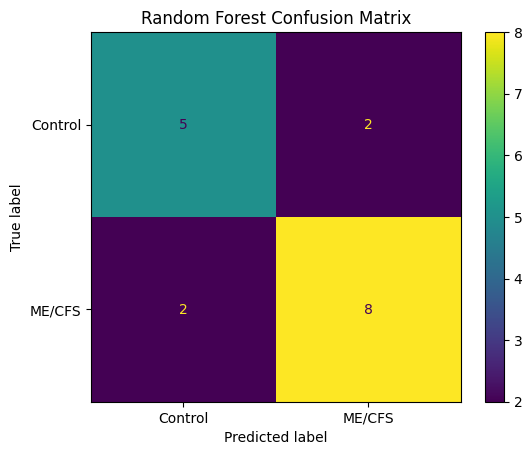

In [46]:
# Prediction
y_pred = rf.predict(X_test_rf)
y_prob = rf.predict_proba(X_test_rf)[:, 1]

acc = accuracy_score(y_test_rf, y_pred)
auc = roc_auc_score(y_test_rf, y_prob)

print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test_rf, y_pred, target_names=['Control', 'ME/CFS']))

# Confusion matrix visualization
cm = confusion_matrix(y_test_rf, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Control', 'ME/CFS'])
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


,Feature,Importance
5,PRKCI,0.089934
21,EPHA7,0.087792
0,PC1,0.086660
9,ATF3,0.066987
6,A1BG,0.066099
18,GRK6,0.054328
2,INHBA,0.047997
7,H1FX,0.043565
20,CTSH,0.041777
17,DDIT3,0.041500


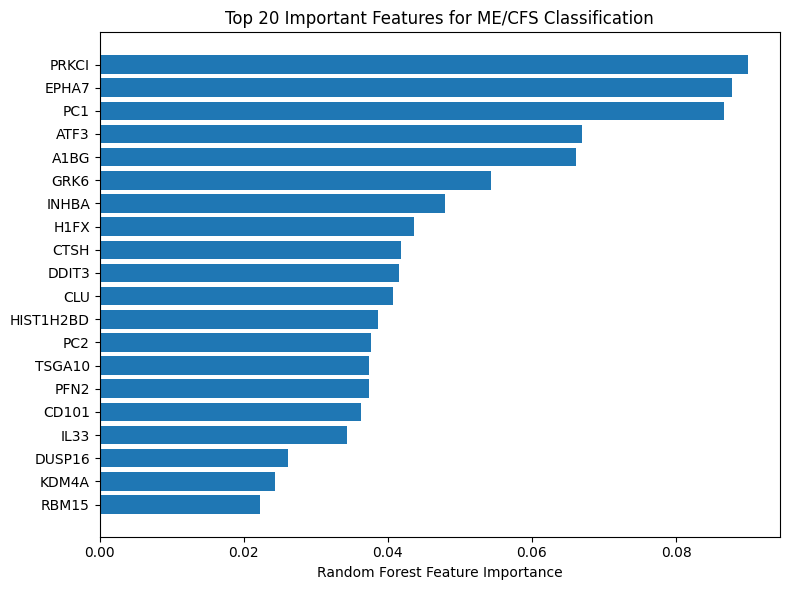

In [47]:
# Feature importance
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

display(feature_importance_df.head(20))

# Plot top 20 important features
top_k = 20
top_features = feature_importance_df.head(top_k)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel("Random Forest Feature Importance")
plt.title("Top 20 Important Features for ME/CFS Classification")
plt.tight_layout()
plt.show()



# RFC Using Biomarker Only as reference

In [48]:
X_biomarker_only = df_with_clusters[top_biomarkers]

X_train_bm, X_test_bm, y_train_bm, y_test_bm = train_test_split(
    X_biomarker_only, y_binary,
    test_size=0.2,
    random_state=42,
    stratify=y_binary
)

rf_bm = RandomForestClassifier(
    n_estimators=500,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_bm.fit(X_train_bm, y_train_bm)

y_pred_bm = rf_bm.predict(X_test_bm)
y_prob_bm = rf_bm.predict_proba(X_test_bm)[:, 1]

acc_bm = accuracy_score(y_test_bm, y_pred_bm)
auc_bm = roc_auc_score(y_test_bm, y_prob_bm)

print(f"[Biomarker only] Accuracy: {acc_bm:.3f}")
print(f"[Biomarker only] AUC: {auc_bm:.3f}")


[Biomarker only] Accuracy: 0.706
[Biomarker only] AUC: 0.757


The integration of PCA-derived components improved the overall classification accuracy of the random forest model (0.765 vs 0.706), indicating enhanced robustness and noise reduction. Although the AUC of the biomarker-only model was slightly higher (0.757 vs 0.743), the difference was marginal, suggesting comparable discriminative performance. Considering both accuracy and model stability, the PCA-integrated random forest was selected as the primary predictive model.